In [1]:
import pandas as pd
from skimage import data, io
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

from tensorflow.image import resize
# from skimage.transform import resize

tqdm.pandas()

In [2]:
data=pd.read_csv('all_data.csv')
cat = 'Dress'

In [3]:
subset = data.loc[(data[data['category_label'] == cat][['mini','midi','maxi']].sum(axis=1)[data[data['category_label'] == cat][['mini','midi','maxi']].sum(axis=1) == 1]).index][['image_name','x_1','x_2','y_1','y_2','mini','midi','maxi']]

In [4]:
subset.query('mini == 1')

,image_name,x_1,x_2,y_1,y_2,mini,midi,maxi
198816,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,21,152,64,254,1.0,NaN,NaN
198818,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,34,141,42,202,1.0,NaN,NaN
198819,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,60,152,39,202,1.0,NaN,NaN
198822,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1,207,53,300,1.0,NaN,NaN
198825,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1,207,59,300,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
289000,img/Painted_Floral_Slip_Dress/img_00000035.jpg,1,111,43,182,1.0,NaN,NaN
289033,img/Paisley_Cami_Trapeze_Dress/img_00000011.jpg,30,148,44,250,1.0,NaN,NaN
289101,img/Paisley_Floral_A-Line_Dress/img_00000015.jpg,41,205,61,300,1.0,NaN,NaN
289118,img/Paisley_Floral_A-Line_Dress/img_00000032.jpg,81,231,79,272,1.0,NaN,NaN


In [5]:
subset.query('midi == 1')

,image_name,x_1,x_2,y_1,y_2,mini,midi,maxi
198712,img/Open-Knit_High-Slit_Maxi_Dress/img_0000004...,73,168,35,239,NaN,1.0,NaN
198724,img/Open-Mesh_Midi_Dress/img_00000001.jpg,60,140,31,225,NaN,1.0,NaN
198725,img/Open-Mesh_Midi_Dress/img_00000002.jpg,185,283,81,282,NaN,1.0,NaN
198726,img/Open-Mesh_Midi_Dress/img_00000003.jpg,53,167,39,221,NaN,1.0,NaN
198727,img/Open-Mesh_Midi_Dress/img_00000004.jpg,80,164,33,216,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...
288921,img/Cutout_Bodycon_Dress/img_00000048.jpg,42,137,39,300,NaN,1.0,NaN
288933,img/Cutout_Bodycon_Dress/img_00000060.jpg,1,91,36,229,NaN,1.0,NaN
289017,img/Paisley_Cami_Maxi_Dress/img_00000016.jpg,75,235,36,270,NaN,1.0,NaN
289031,img/Paisley_Cami_Trapeze_Dress/img_00000009.jpg,52,155,35,248,NaN,1.0,NaN


In [6]:
subset.query('maxi == 1').sample(3000,random_state=1)

,image_name,x_1,x_2,y_1,y_2,mini,midi,maxi
206289,img/Braided_Strap_Maxi_Dress/img_00000048.jpg,91,211,34,300,NaN,NaN,1.0
261958,img/Pleated_Chiffon_Maxi_Dress/img_00000018.jpg,93,206,1,300,NaN,NaN,1.0
266126,img/Rose_Print_Maxi_Dress/img_00000040.jpg,40,185,20,295,NaN,NaN,1.0
239041,img/Lace_Love_Maxi_Dress/img_00000072.jpg,81,158,37,290,NaN,NaN,1.0
269640,img/Side-Slit_Maxi_Dress/img_00000050.jpg,60,144,22,300,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
284839,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,118,185,1,158,NaN,NaN,1.0
287902,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,57,151,15,281,NaN,NaN,1.0
215018,img/Dainty_A-Line_Dress/img_00000074.jpg,106,202,34,191,NaN,NaN,1.0
206860,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,106,201,53,300,NaN,NaN,1.0


In [7]:
sample=pd.concat([subset.query('mini == 1'), subset.query('midi == 1'), subset.query('maxi == 1').sample(3000,random_state=1)])

In [8]:
sample

,image_name,x_1,x_2,y_1,y_2,mini,midi,maxi
198816,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,21,152,64,254,1.0,NaN,NaN
198818,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,34,141,42,202,1.0,NaN,NaN
198819,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,60,152,39,202,1.0,NaN,NaN
198822,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1,207,53,300,1.0,NaN,NaN
198825,img/Open-Shoulder_Eyelash_Lace_Dress/img_00000...,1,207,59,300,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
284839,img/Chiffon-Paneled_Maxi_Dress/img_00000024.jpg,118,185,1,158,NaN,NaN,1.0
287902,img/Crocheted_Gauze_Maxi_Dress/img_00000020.jpg,57,151,15,281,NaN,NaN,1.0
215018,img/Dainty_A-Line_Dress/img_00000074.jpg,106,202,34,191,NaN,NaN,1.0
206860,img/Butterfly_Print_Maxi_Dress/img_00000066.jpg,106,201,53,300,NaN,NaN,1.0


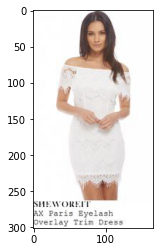

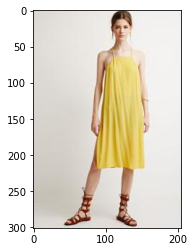

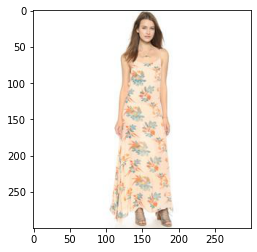

In [9]:
plt.imshow(io.imread(sample.query("mini == 1").iloc[0,0])) #mini
plt.show()
plt.imshow(io.imread(sample.query("midi == 1").iloc[0,0])) #midi
plt.show()
plt.imshow(io.imread(sample.query("maxi == 1").iloc[0,0])) #maxi
plt.show()

In [10]:
## Resized within supplied bounding box
# images = sample.progress_apply(lambda x: resize(io.imread(x['image_name'])[x['y_1']:x['y_2'],x['x_1']:x['x_2']], (100,100)),axis=1).to_numpy()

## Resized whole image (ignore bounding box)
images_full = sample.progress_apply(lambda x: resize(io.imread(x['image_name']), (100,100)),axis=1).to_numpy()

  0%|          | 0/8185 [00:00<?, ?it/s]

In [11]:
with open(f'mmm_array.npz', 'wb+') as f:
    np.savez_compressed(f, image_full, allow_pickle = True)

with open(f'mmm_array_full.npz', 'wb+') as f:
    np.savez_compressed(f, images_full, allow_pickle = True)

sample.to_csv(f'mmm_attr.csv', index = False)

In [12]:
subset[subset['image_name'] == "img/Deep_V-Neck_Pleated_Dress/img_00000007.jpg"]

,image_name,x_1,x_2,y_1,y_2,mini,midi,maxi
216004,img/Deep_V-Neck_Pleated_Dress/img_00000007.jpg,27,176,60,276,1.0,NaN,NaN
